# Table of contents: Ciphers

* [Shift Cipher](#shift-cipher)
    * [Attack on shift Cipher](#attack-shift-cipher)
* [Monoalphabetic Cipher](#monoalphabetic-cipher)
* [Vigenère Cipher](#vigenere-cipher)
    
    
Author: [Sebastià Agramunt Puig](https://github.com/sebastiaagramunt) for [OpenMined](https://www.openmined.org/) Privacy ML Series course. 

**Python Bascis** Main ref: https://blog.avenuecode.com/containers-iterables-iterators-and-generators
*List/dictioanary comprehension*: List comprehension offers a shorter syntax when you want to create a new list based on the values of an existing list.  

Mixin classes: those are small classes that provide attributes but are not included in the standard inheritance tree, working more as "additions" to the current class than as proper ancestors. A mixin is a special kind of multiple inheritance. There are two main situations where mixins are used:  

    You want to provide a lot of optional features for a class.
    You want to use one particular feature in a lot of different classes.  

*Dunder methods*, or magic methods, are special methods in Python that you can use to enrich your classes. The term "dunder" stands for “double under” and is used because these special methods have a double underscore in their prefix and suffix. This is a language feature that allows you to define your behaviors for the classes. A very commonly used dunder method is __init__, which works like a constructor in other languages. It’s called after the instance has been created but before it is returned to the caller.  

*Method overriding* is an ability of any object-oriented programming language that allows a subclass or child class to provide a specific implementation of a method that is already provided by one of its super-classes or parent classes. When a method in a subclass has the same name, same parameters or signature and same return type(or sub-type) as a method in its super-class, then the method in the subclass is said to override the method in the super-class. The version of a method that is executed will be determined by the object that is used to invoke it. If an object of a parent class is used to invoke the method, then the version in the parent class will be executed, but if an object of the subclass is used to invoke the method, then the version in the child class will be executed. In other words, it is the type of the object being referred to (not the type of the reference variable) that determines which version of an overridden method will be executed.  

*Containers* are data structures that hold other objects and support membership tests using the in operator via the __contains__ magic method. Tuple, list, set, strings, and dict are examples of containers. Usually, containers provide a way to access the contained objects and to iterate over them.  

*An iterator* is an object that contains a countable number of values. An iterator is an object that can be iterated upon, meaning that you can traverse through all the values. Technically, in Python, an iterator is an object which implements the iterator protocol, which consist of the methods __iter__() and __next__(). Lists, tuples, dictionaries, and sets are all iterable objects. They are iterable containers which you can get an iterator from. An iterable is any object that can return an iterator, and an iterator is the object used to iterate over an iterable object. It works like a lazy factory that is idle until you ask it for a value. Note that every iterator is also an iterable, but not every iterable is an iterator. Confused? Let’s look at some examples.   

Python’s *zip()* function is defined as zip(iterables). The function takes in iterables as arguments and returns an iterator. This iterator generates a series of tuples containing elements from each iterable. I.e., each input tuple becomes an element of an iterator. Tuple a=1,2 and tuple b=3,4, would become the tuple a, b=(1,3),(2,4).


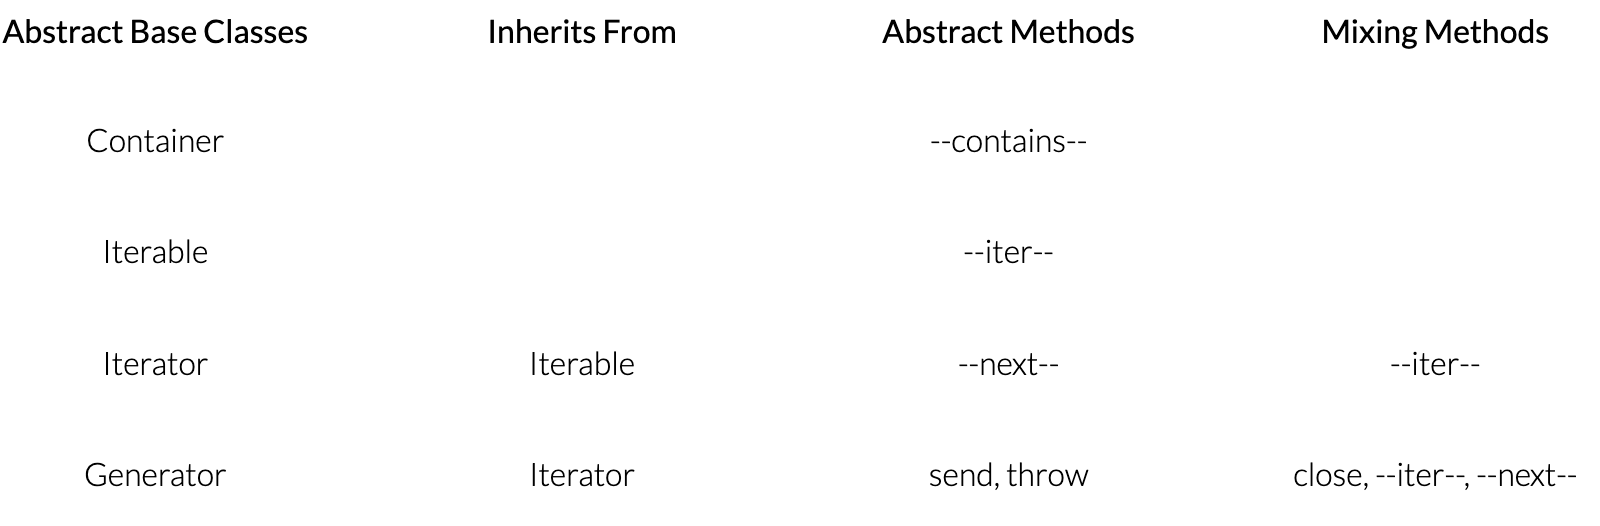

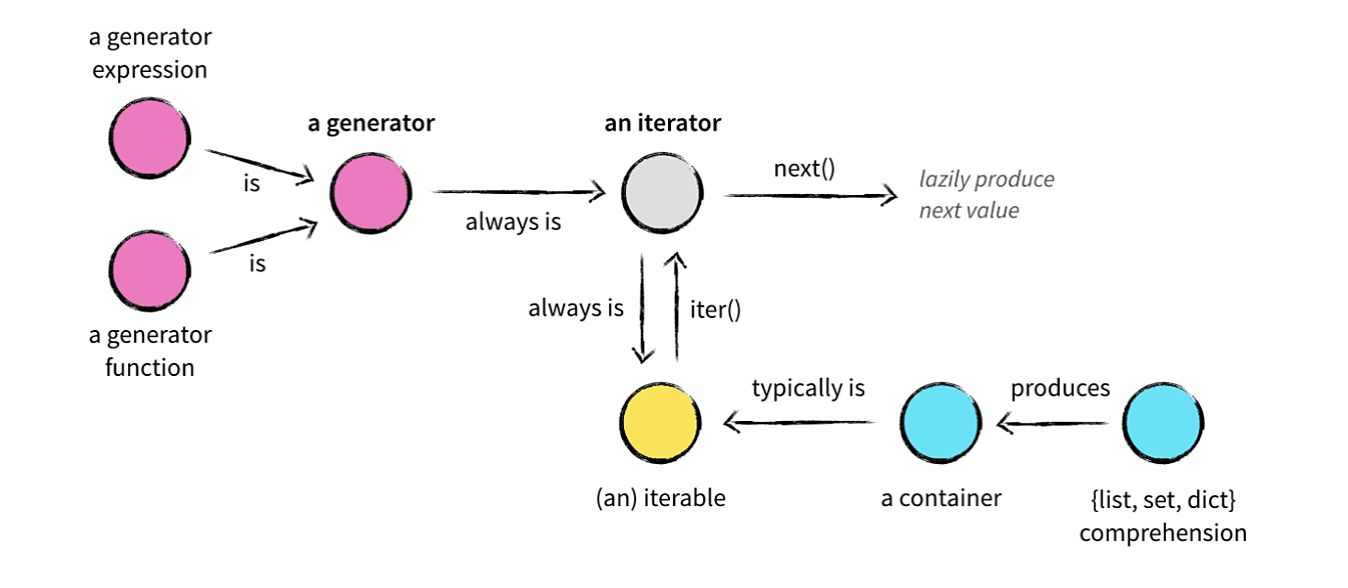


In secure communication one tries to convert information into a coded form i.e. to **encode** information. Information can be encoded using what is known in cryptography as a **cipher** which is no less than al algorithm that allows us to encode and decode information. In the field of cryptography we name **encryption** to the process of encode information and **decryption** to the process of decoding it.

Next we explore the most basic cipher working on text, this is, the Caesar's cipher or shift cipher


## Shift Cipher <a class="anchor" id="shift-cipher"></a>

One of the oldest known ciphers is the Shift cipher. In this cipher we encrypt the alphabet by shifting a certain number of places the letters of our message. Julius Caesar used the Shift cipher to communicate secretly with his military, but he used a fixed shift of three, this is why the Shift cipher with the specific shift of three is known as the Caesar's cipher but is nothing less that a particular case for the shift cipher.

In the shift cipher the two interlocutors (the **sender** and the **receiver**) have to agree on a common **secret key**, this is, the shift or a number in between 0 and 26 (corresponding to the 26 letters in the english alphabet). They have to meet in person to agree on which secret key they are going to use so that they are sure nobody else knows the key.

The shift cipher is a **substitution** cipher meaning that each character of our message is substituted by another character, let's see the substitution for the secret_key "b", i.e. a shift of 1


| secret_key | letter shift | plaintext | ciphertext |
|------------|--------------|-----------|------------|
| b          | 1            | a         | b          |
| b          | 1            | b         | c          |
| b          | 1            | c         | d          |
| ...        | ...          | ...       | ...        |
| b          | 1            | y         | z          |
| b          | 1            | z         | a          |

The Caesar's cipher is the shift cipher with 3 shifts, i.e. secret key d.

| secret_key | letter shift | plaintext | ciphertext |
|------------|--------------|-----------|------------|
| d          | 3            | a         | d          |
| d          | 3            | b         | e          |
| d          | 3            | c         | f          |
| ...        | ...          | ...       | ...        |
| d          | 3            | y         | b          |
| d          | 3            | z         | c          |

In [1]:
import string

print(f"These are ascii lowercase we will use for our messages:\n\t{string.ascii_lowercase}")

These are ascii lowercase we will use for our messages:
	abcdefghijklmnopqrstuvwxyz


In [33]:
# inputs a shift letter and outputs the equivalent conversion
# conversion of abcdefghijklmnopqrstuvwxyz to the equivalent in ciphertext
# ex: if key is "b": bcdefghijklmnopqrstuvwxyza
#     if key is "c": cdefghijklmnopqrstuvwxyzab
def shift_by(secret_key: str) -> str:
    
    assert len(secret_key)==1, "secret key must be lenght 1"
    assert secret_key in string.ascii_lowercase, f"{secret_key} is not ascii lowercase"
    
    int_key = ord(secret_key) - 97
    
    return string.ascii_lowercase[int_key:] + string.ascii_lowercase[:int_key] 

print(f"alphabet:\n\t{string.ascii_lowercase}")
print(f"ceasar encrypted alphabet\n\t{shift_by('d')}")

alphabet:
	abcdefghijklmnopqrstuvwxyz
ceasar encrypted alphabet
	defghijklmnopqrstuvwxyzabc


As you can see, we substitute *a* by *d* (shifted 3 positions), *b* by *e* and so on wrapping around the alphabet.

In cryptography, a message that is not encrypted is called a **plaintext** message whilst when it is encrypted is considered a **ciphertext** message. Let's code the encryption and decryption algorithm:

In [71]:
def shift_encrypt(plaintext: str, secret_key: str) -> str:
    
    shifted = shift_by(secret_key)
    print(shifted)
    
    convert_dict = {p:c for p, c in zip(string.ascii_lowercase, shifted)}
    print(convert_dict)
    convert_dict[" "] = " "
    print(convert_dict)
    return ''.join([convert_dict[p] for p in plaintext])
    
    
def shift_decrypt(ciphertext: str, secret_key: str) -> str:
    
    shifted = shift_by(secret_key)
    
    convert_dict = {c:p for p, c in zip(string.ascii_lowercase, shifted)}
    convert_dict[" "] = " "
    
    return ''.join([convert_dict[c] for c in ciphertext])

In [72]:
shift_encrypt("bon dia i bona tarde", "c")

cdefghijklmnopqrstuvwxyzab
{'a': 'c', 'b': 'd', 'c': 'e', 'd': 'f', 'e': 'g', 'f': 'h', 'g': 'i', 'h': 'j', 'i': 'k', 'j': 'l', 'k': 'm', 'l': 'n', 'm': 'o', 'n': 'p', 'o': 'q', 'p': 'r', 'q': 's', 'r': 't', 's': 'u', 't': 'v', 'u': 'w', 'v': 'x', 'w': 'y', 'x': 'z', 'y': 'a', 'z': 'b'}
{'a': 'c', 'b': 'd', 'c': 'e', 'd': 'f', 'e': 'g', 'f': 'h', 'g': 'i', 'h': 'j', 'i': 'k', 'j': 'l', 'k': 'm', 'l': 'n', 'm': 'o', 'n': 'p', 'o': 'q', 'p': 'r', 'q': 's', 'r': 't', 's': 'u', 't': 'v', 'u': 'w', 'v': 'x', 'w': 'y', 'x': 'z', 'y': 'a', 'z': 'b', ' ': ' '}


'dqp fkc k dqpc vctfg'

In [73]:
def shift_cipher(text: str, secret_key: str, encrypt: bool=True) -> str:
    
    shifted = shift_by(secret_key)
    
    if encrypt:
        
        convert_dict = {p:c for p, c in zip(string.ascii_lowercase, shifted)}
        
    else:
        
        convert_dict = {c:p for p, c in zip(string.ascii_lowercase, shifted)}
        
    convert_dict[" "] = " "
    
    return ''.join(convert_dict[c] for c in text)

In [76]:
shift_cipher("i do not want you to know what i am sending", "c", encrypt=True)

'k fq pqv ycpv aqw vq mpqy yjcv k co ugpfkpi'

We can now send a message with the Caesar's cipher (secret_key = 3)

In [77]:
# specific Caesar's cipher secret_key
secret_key = "c"
message = "this is a secret message"
encrypted_message = shift_cipher(message, secret_key)

print(f"Plaintext is: \n\t{message}")
print(f"Ciphertext is: \n\t{encrypted_message}")

Plaintext is: 
	this is a secret message
Ciphertext is: 
	vjku ku c ugetgv oguucig


The message is now unreadeable for anybody that doesn't know the key!. Let's decrypt it with the key

In [78]:
decrypted_message = shift_cipher(encrypted_message, secret_key, encrypt=False)

print(f"Original message is: \n\t{message}")
print(f"Ciphertext is: \n\t{encrypted_message}")
print(f"Decrypted message is: \n\t{decrypted_message}")

Original message is: 
	this is a secret message
Ciphertext is: 
	vjku ku c ugetgv oguucig
Decrypted message is: 
	this is a secret message


And we recover back the original message!.

### Attack on shift cipher <a class="anchor" id="attack-shift-cipher"></a>

The secret key in the shift cipher can go from 0 to 26 (the number of letters in the english alphabet). Can an eavesdropper break the ciphertext?. A simple attack can be checking all the possible keys over the intercepted ciphertext:

In [79]:
from random import randrange, seed

seed(4)

secret_key = string.ascii_lowercase[randrange(len(string.ascii_lowercase))]
message = "this is a message"
encrypted_message = shift_cipher(message, secret_key)

print(f"secret_key:\n\t{secret_key}")
print(f"message:\n\t{message}")
print(f"encrypted_message:\n\t{encrypted_message}\n\n")

for possible_key in string.ascii_lowercase:
    decrypted_message = shift_cipher(encrypted_message, possible_key, encrypt=False)
    print(f"Decrypted message for key {possible_key}:\n\t{decrypted_message}")

secret_key:
	h
message:
	this is a message
encrypted_message:
	aopz pz h tlzzhnl


Decrypted message for key a:
	aopz pz h tlzzhnl
Decrypted message for key b:
	znoy oy g skyygmk
Decrypted message for key c:
	ymnx nx f rjxxflj
Decrypted message for key d:
	xlmw mw e qiwweki
Decrypted message for key e:
	wklv lv d phvvdjh
Decrypted message for key f:
	vjku ku c oguucig
Decrypted message for key g:
	uijt jt b nfttbhf
Decrypted message for key h:
	this is a message
Decrypted message for key i:
	sghr hr z ldrrzfd
Decrypted message for key j:
	rfgq gq y kcqqyec
Decrypted message for key k:
	qefp fp x jbppxdb
Decrypted message for key l:
	pdeo eo w iaoowca
Decrypted message for key m:
	ocdn dn v hznnvbz
Decrypted message for key n:
	nbcm cm u gymmuay
Decrypted message for key o:
	mabl bl t fxlltzx
Decrypted message for key p:
	lzak ak s ewkksyw
Decrypted message for key q:
	kyzj zj r dvjjrxv
Decrypted message for key r:
	jxyi yi q cuiiqwu
Decrypted message for key s:
	iwxh xh p bthhpvt
Decry

## Mono Alphabetic cipher <a class="anchor" id="monoalphabetic-cipher"></a>

We've seen that the shift cipher is easy to break as the number of possible keys was just 26. A better approach would be to simply substitute each letter of the alphabet by another random letter. This way we would have 26! different permutations (that is a number of the order of $10^{26}$). Here we cannot do exhaustive search, it would take so long for our computer. A secret key could be for instance "bdeoinmkclxuqzytpwvjgafrsh", where the ciphertext for "a" is "b", the ciphertext for "b" is "d" and so on.

Let's code the random key generator

Before that, I looked for what deepcopy was

In [111]:
# Ref: https://www.programiz.com/python-programming/shallow-deep-copy, https://www.geeksforgeeks.org/copy-python-deep-copy-shallow-copy/
# Copy using "=", an assignment statement
import copy
old_list = [[1, 2, 3], [4, 5, 6], [7, 8, 'a']]
new_list = old_list

new_list[2][2] = 9

print('Old List:', old_list)
print('ID of Old List:', id(old_list))

print('New List:', new_list)
print('ID of New List:', id(new_list))

print("Changed_1")
new_list.append([1])
print('Old List:', old_list)
print('ID of Old List:', id(old_list))
print('New List:', new_list)
print('ID of New List:', id(new_list))

# However, using copy we avoid this. It changes only the new_list - Shallow copy
old_list = [[1, 2, 3], [4, 5, 6], [7, 8, 'a']]
new_list = copy.copy(old_list)

print("Changed_2")
new_list.append([1])
print('Old List:', old_list)
print('ID of Old List:', id(old_list))
print('New List:', new_list)
print('ID of New List:', id(new_list))

Old List: [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
ID of Old List: 4478188160
New List: [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
ID of New List: 4478188160
Changed_1
Old List: [[1, 2, 3], [4, 5, 6], [7, 8, 9], [1]]
ID of Old List: 4478188160
New List: [[1, 2, 3], [4, 5, 6], [7, 8, 9], [1]]
ID of New List: 4478188160
Changed_2
Old List: [[1, 2, 3], [4, 5, 6], [7, 8, 'a']]
ID of Old List: 4505245312
New List: [[1, 2, 3], [4, 5, 6], [7, 8, 'a'], [1]]
ID of New List: 4478172224


A shallow copy creates a new independent copy. The new_list contains references to original nested objects stored in old_list. So if you add elements to the old list, the new list will not consider them, but if you modify the contents of the old list, then the new list will also be changed, because it is a reference to the original values, which now have been modified.  
A shallow copy means constructing a new collection object and then populating it with references to the child objects found in the original. The copying process does not recurse and therefore won’t create copies of the child objects themselves. In case of shallow copy, a reference of object is copied in other object. It means that any changes made to a copy of object do reflect in the original object.

In [117]:
# However, using copy we avoid this. It changes only the new_list - Shallow copy
old_list = [[1, 2, 3], [4, 5, 6], [7, 8, 'a']]
new_list = copy.copy(old_list)

print("Adding to old list an element does not make changes in new list")
old_list.append([4, 4, 4])
print('Old List:', old_list)
print('ID of Old List:', id(old_list))
print('New List:', new_list)
print('ID of New List:', id(new_list))
print("Adding to new list an element does not make changes in old list")
new_list.append([9, 9])
print('Old List:', old_list)
print('ID of Old List:', id(old_list))
print('New List:', new_list)
print('ID of New List:', id(new_list))

Adding to old list an element does not make changes in new list
Old List: [[1, 2, 3], [4, 5, 6], [7, 8, 'a'], [4, 4, 4]]
ID of Old List: 4505246720
New List: [[1, 2, 3], [4, 5, 6], [7, 8, 'a']]
ID of New List: 4505330688
Adding to new list an element does not make changes in old list
Old List: [[1, 2, 3], [4, 5, 6], [7, 8, 'a'], [4, 4, 4]]
ID of Old List: 4505246720
New List: [[1, 2, 3], [4, 5, 6], [7, 8, 'a'], [9, 9]]
ID of New List: 4505330688


However, modification do matter. Because the original values, to which these two lists are referenced, are changed.

In [118]:
old_list = [[1, 2, 3], [4, 5, 6], [7, 8, 'a']]
new_list = copy.copy(old_list)

print("Adding to old list an element does make changes in new list")
old_list[1][2] = "foo"
print('Old List:', old_list)
print('ID of Old List:', id(old_list))
print('New List:', new_list)
print('ID of New List:', id(new_list))
print("Adding to new list an element does make changes in old list")
new_list.append([9, 9])
new_list[2][2] = "bar"
print('Old List:', old_list)
print('ID of Old List:', id(old_list))
print('New List:', new_list)
print('ID of New List:', id(new_list))

Adding to old list an element does make changes in new list
Old List: [[1, 2, 3], [4, 5, 'foo'], [7, 8, 'a']]
ID of Old List: 4478780352
New List: [[1, 2, 3], [4, 5, 'foo'], [7, 8, 'a']]
ID of New List: 4478186880
Adding to new list an element does make changes in old list
Old List: [[1, 2, 3], [4, 5, 'foo'], [7, 8, 'bar']]
ID of Old List: 4478780352
New List: [[1, 2, 3], [4, 5, 'foo'], [7, 8, 'bar'], [9, 9]]
ID of New List: 4478186880


To solve this, deepcopies are used. A deep copy creates a new object and recursively adds the copies of nested objects present in the original elements.  
Deep copy is a process in which the copying process occurs recursively. It means first constructing a new collection object and then recursively populating it with copies of the child objects found in the original. In case of deep copy, a copy of object is copied in other object. It means that any changes made to a copy of object do not reflect in the original object. 

In [119]:
old_list = [[1, 2, 3], [4, 5, 6], [7, 8, 'a']]
new_list = copy.deepcopy(old_list)

print("Adding to old list an element does make changes in new list")
old_list[1][2] = "foo"
print('Old List:', old_list)
print('ID of Old List:', id(old_list))
print('New List:', new_list)
print('ID of New List:', id(new_list))
print("Adding to new list an element does make changes in old list")
new_list.append([9, 9])
new_list[2][2] = "bar"
print('Old List:', old_list)
print('ID of Old List:', id(old_list))
print('New List:', new_list)
print('ID of New List:', id(new_list))

Adding to old list an element does make changes in new list
Old List: [[1, 2, 3], [4, 5, 'foo'], [7, 8, 'a']]
ID of Old List: 4504915136
New List: [[1, 2, 3], [4, 5, 6], [7, 8, 'a']]
ID of New List: 4479314624
Adding to new list an element does make changes in old list
Old List: [[1, 2, 3], [4, 5, 'foo'], [7, 8, 'a']]
ID of Old List: 4504915136
New List: [[1, 2, 3], [4, 5, 6], [7, 8, 'bar'], [9, 9]]
ID of New List: 4479314624


In [122]:
from copy import deepcopy

seed(1)

# random permutation of the alphabet
def mono_key_generator()-> str:
    chars = list(deepcopy(string.ascii_lowercase))
    chars_permutation = []
    
    while len(chars)>0:
        letter = chars.pop(randrange(len(chars)))
        chars_permutation.append(letter)
        
    return ''.join(chars_permutation)

print(f"Plaintext characters are: \n\t{string.ascii_lowercase}")
print(f"Equivalent in one random mono-alphabetic order: \n\t{mono_key_generator()}")

Plaintext characters are: 
	abcdefghijklmnopqrstuvwxyz
Equivalent in one random mono-alphabetic order: 
	etckfuswqjgnaopybxmvhzdlir


Now they key is a 26 character string, in this case "etckfuswqjgnaopybxmvhzdlir". This is difficult very to guess!. In the first exercice you'll learn how to break this code, at least, partially. Let's code the encryption/decryption algorithms

In [123]:
def mono_encrypt_decrypt(text: str, secret_key: str, encrypt: bool=True) -> str:
    if encrypt:
        convert_dict = {p:c for p, c in zip(string.ascii_lowercase, secret_key)}
    else:
        convert_dict = {c:p for p, c in zip(string.ascii_lowercase, secret_key)}
    convert_dict[" "] = " "
    
    return ''.join(convert_dict[c] for c in text)
    

In [124]:
# generate a random secret key for mono alphabetic
secret_key = mono_key_generator()

# sentence to encrypt and ciphertext
sentence = 'criptography is a cool subject'
ciphertext = mono_encrypt_decrypt(sentence, secret_key)
plaintext = mono_encrypt_decrypt(ciphertext, secret_key, encrypt=False)

print(f"THE SECRET KEY: \n{secret_key}\n\nTHE SENTENCE:\n{sentence}\n\nCIPHERTEXT:\n{ciphertext}\n\nPLAINTEXT:\n{plaintext}")

THE SECRET KEY: 
avsboircylxmpgkhjwqdtzefun

THE SENTENCE:
criptography is a cool subject

CIPHERTEXT:
swyhdkrwahcu yq a skkm qtvlosd

PLAINTEXT:
criptography is a cool subject


## Vigenère Cipher <a class="anchor" id="vigenere-cipher"></a>

Let's go for an even more difficult cipher to crack, the Vigenère cipher.

The first difficulty of the Vigenere cipher is that the lenght of the key is arbitrary and indicates the permutation of the text. In the following table a simple example is shown: 


|  Variable  |      Value      |
|:----------:|:---------------:|
| Plaintext  | ddddddddddddddd |
| Key        | abc             |
| Ciphertext | defdefdefdefdef |

Here our plaintext is $ddddddddddddddd$ and we encrypt it using the key $abc$ of lenght 3. It is easy to see how it works. The first letter of the plaintext is shifted $a$ (shift of 0), the second shifted $b$ (shift of 1 position) and the third one by $c$ (shift of 3 positions). Therefore $$ d \rightarrow d $$ $$ d \rightarrow e $$ $$ d \rightarrow f $$ 

Another more difficult example is the following:

|  Variable  |            Value            |
|:----------:|:---------------------------:|
| Plaintext  | criptographyisacoolsubject  |
| Key        | esz                         |
| Ciphertext | gjhtlnkjztzxmkzggnpktfbdgl  |

We've chosen as key a random chain of size 3, this is $esz$. Again, $c$ is shifted $e$ (4 positions), $r$ shifted $j$ (9 positions) and $i$ shifted by $h$ (7 positions). Then, the next character $p$ is shifted by the first letter of the key $e$, this results $t$.

Let's code the Vigenere cipher, first the random key generator


In [125]:
def vigenere_key_generator(secret_key_size: int) -> str:
    n = len(string.ascii_lowercase)
    secret_key = ''
    while len(secret_key) < secret_key_size:
        secret_key += string.ascii_lowercase[randrange(n)]
    return secret_key

We need a helper function to shift the letter by a certain character

In [126]:
def shift_letter(letter: str, shiftby: str, forward: bool=True) -> str:
    n = len(string.ascii_lowercase)
    
    letter_int = ord(letter) - 97
    shiftby_int = ord(shiftby) - 97
    
    if forward:
        return string.ascii_lowercase[(letter_int+shiftby_int)%n]
    else:
        return string.ascii_lowercase[(letter_int-shiftby_int)%n]

And finally we an write the Vingenere function for encryption and decryption

In [15]:
def vigenere_encrypt_decrypt(message: str, secret_key: str, encrypt:bool = True) -> str:
    key_len = len(secret_key)
    
    encoded = ''
    for i, letter in enumerate(message):
        if letter != " ":
            encoded += shift_letter(letter, secret_key[i%key_len], forward=encrypt)
        else:
            encoded += letter
    return encoded

In [16]:
# generate key
secret_key_size = 5
secret_key = vigenere_key_generator(secret_key_size)

# encrypt a text
sentence = 'criptography is a coolsubject'
ciphertext = vigenere_encrypt_decrypt(sentence, secret_key, encrypt=True)
plaintext = vigenere_encrypt_decrypt(ciphertext, secret_key, encrypt=False)

print(f"THE SECRET KEY: \n{secret_key}\n\nTHE SENTENCE:\n{sentence}\n\nCIPHERTEXT:\n{ciphertext}\n\nPLAINTEXT:\n{plaintext}")

THE SECRET KEY: 
xkxwq

THE SENTENCE:
criptography is a coolsubject

CIPHERTEXT:
zbfljlqowfei ei k yelvpqrgozp

PLAINTEXT:
criptography is a coolsubject
